##### 1. If we have two data points, say

$$(x_1, y_1)=(3,5),\, (x_2, y_2)=(4,6)$$

We can create a `linear` model $y=ax+b$, where $a$ and $b$ are model `parameters` which we will obtain by fitting this model to the data points

This creates a set of equations

$$\begin{align*}
5&=a\cdot 3+b\\
6&=a\cdot 4+b
\end{align*}$$

And we can get

$$\begin{align*}
a&=1\\
b&=2
\end{align*}$$

##### 2. To more systematically investigate such problems, we will use `matrix` notation. Note the set of equations can also be written as

$$\begin{align*}
5&=a\cdot 3+b\cdot 1\\
6&=a\cdot 4+b\cdot 1
\end{align*}$$

We can effectively write as

$$\mathbf{y}=A\mathbf{\theta}$$

where

$$\mathbf{y}=\begin{bmatrix} 5 \\ 6 \end{bmatrix},\, A=\begin{bmatrix} 3 & 1 \\ 4 & 1 \end{bmatrix},\, \mathbf{\theta}=\begin{bmatrix} a \\ b \end{bmatrix}$$

Note that first column of $A$ is $\begin{bmatrix} x_1 \\ x_2 \end{bmatrix}$

##### 3. Similar to $y=ax$ where we can get $a=x^{-1}y$, for `square` matrix $A$, it is also possible that

$$\mathbf{\theta}=A^{-1}\mathbf{y}$$

where we call $A^{-1}$ the `inverse` of $A$

For 2x2 matrix $A=\begin{bmatrix} a & b \\ c & d \end{bmatrix}$, we have the equation

$$A^{-1}=\frac{1}{ad-bc}\begin{bmatrix} d & -b \\ -c & a \end{bmatrix}$$

as long as $ad-bc\neq0$

##### 4. So for our example, we can get

$$\begin{align*}\mathbf{\theta}&=\frac{1}{ad-bc}\begin{bmatrix} d & -b \\ -c & a \end{bmatrix}\mathbf{y}\\
&=\frac{1}{3\cdot 1-4\cdot 1}\begin{bmatrix} 1 & -1 \\ -4 & 3 \end{bmatrix}\begin{bmatrix} 5 \\ 6 \end{bmatrix}
\end{align*}$$

We don't have to compute by hand, we can use `numpy`

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(formatter={'float': '{: 0.4f}'.format})
plt.style.use('dark_background')

In [ ]:
A = np.array([[3, 1], [4, 1]])
y = np.array([5, 6])

Use `@` to complete matrix/vector multiplication, and `*` multiplication with scaler

In [ ]:
theta = 1/(3*1-4*1)*np.array([[1, -1], [-4, 3]])@y
theta

array([ 1.0000,  2.0000])

Or, we can use the numpy inverse function `np.linalg.inv(A)` to compute $A^{-1}$ directly

In [ ]:
theta = np.linalg.inv(A)@y
theta

array([ 1.0000,  2.0000])

We can then plot the data points and line to see the results

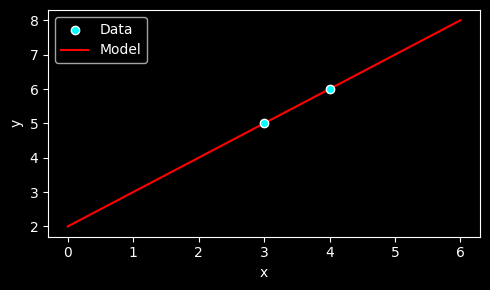

In [ ]:
def prediction(x, theta):
    return theta[0]*x + theta[1]

fig, ax=plt.subplots(figsize=(5,3))

plt.scatter(A[:,0], y, color='cyan', label='Data', edgecolors='w')
ax.plot([0,6],[prediction(0, theta), prediction(6, theta)],'r-', label='Model',zorder=-5)

ax.set_xlabel('x')
ax.set_ylabel('y')
plt.tight_layout()
plt.legend()
plt.show()